# Basics

In [1]:
import pandas as pd
import re

webserver = pd.read_csv('Analytics/data/webserver.csv', delimiter=',')
client = pd.read_csv('Analytics/data/access3.csv', delimiter=',')
data = pd.read_csv('Analytics/data/weblog.csv',squeeze=True)
data = data.rename(columns={'Staus': 'Status'}, index={'ONE': 'one'})

In [2]:
import requests

def get_location(ip_address):
    response = requests.get(f'https://ipapi.co/{ip_address}/json/').json()
    location_data = {
        "ip": ip_address,
        "city": response.get("city"),
        "region": response.get("region"),
        "country": response.get("country_name")
    }
    return location_data

In [10]:
client['location']= client['client'].values
client['location']=client['location'].head(10).map(lambda x: get_location(x))

In [11]:
client

,Unnamed: 0,client,datetime,method,request,status,size,referer,user_agent,location
0,0,37.152.163.59,2019-01-22 12:38:27+03:30,GET,/image/29314?name=%D8%AF%DB%8C%D8%A8%D8%A7-7.j...,200,1105,https://www.zanbil.ir/product/29314/%DA%A9%D8%...,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,"{'ip': '37.152.163.59', 'city': None, 'region'..."
1,1,37.152.163.59,2019-01-22 12:38:27+03:30,GET,/static/images/zanbil-kharid.png,200,358,https://www.zanbil.ir/product/29314/%DA%A9%D8%...,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,"{'ip': '37.152.163.59', 'city': None, 'region'..."
2,2,85.9.73.119,2019-01-22 12:38:27+03:30,GET,/static/images/next.png,200,3045,https://znbl.ir/static/bundle-bundle_site_head...,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,"{'ip': '85.9.73.119', 'city': None, 'region': ..."
3,3,37.152.163.59,2019-01-22 12:38:27+03:30,GET,/image/29314?name=%D8%AF%DB%8C%D8%A8%D8%A7-4.j...,200,1457,https://www.zanbil.ir/product/29314/%DA%A9%D8%...,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,"{'ip': '37.152.163.59', 'city': None, 'region'..."
4,4,85.9.73.119,2019-01-22 12:38:27+03:30,GET,/static/images/checked.png,200,1083,https://znbl.ir/static/bundle-bundle_site_head...,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,"{'ip': '85.9.73.119', 'city': None, 'region': ..."
...,...,...,...,...,...,...,...,...,...,...
1495,1495,5.160.88.198,2019-01-22 12:39:06+03:30,GET,/image/9505/productModel/100x100,200,1731,https://www.zanbil.ir/product/7691/9508/%D8%B3...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN
1496,1496,5.160.88.198,2019-01-22 12:39:06+03:30,GET,/image/9506/productModel/100x100,200,1767,https://www.zanbil.ir/product/7691/9508/%D8%B3...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN
1497,1497,51.15.229.125,2019-01-22 12:39:06+03:30,GET,/static/css/font/wyekan/font.woff,200,28536,https://www.zanbil.ir/m/browse/microwave-oven/...,Mozilla/5.0 (Linux; Android 7.0; SM-T819 Build...,NaN
1498,1498,2.190.144.182,2019-01-22 12:39:06+03:30,GET,/static/images/jcountdown/jcountdown_metal_bla...,200,17355,https://znbl.ir/static/bundle-bundle_site_head...,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,NaN


In [6]:
data['location']= data['IP'].values

In [8]:
data['location']=data['location'].head(10).map(lambda x: get_location(x))

In [9]:
data

,Unnamed: 0,IP,Time,URL,Status,month,day,Methods,URL_new,location
0,0,10.128.2.1,29/Nov/2017,GET /login.php HTTP/1.1,200,Nov,29,GET,login.php HTTP,"{'ip': '10.128.2.1', 'city': None, 'region': N..."
1,1,10.128.2.1,29/Nov/2017,POST /process.php HTTP/1.1,302,Nov,29,POST,process.php HTTP,"{'ip': '10.128.2.1', 'city': None, 'region': N..."
2,2,10.128.2.1,29/Nov/2017,GET /home.php HTTP/1.1,200,Nov,29,GET,home.php HTTP,"{'ip': '10.128.2.1', 'city': None, 'region': N..."
3,3,10.131.2.1,29/Nov/2017,GET /js/vendor/moment.min.js HTTP/1.1,200,Nov,29,GET,js,"{'ip': '10.131.2.1', 'city': None, 'region': N..."
4,4,10.130.2.1,29/Nov/2017,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200,Nov,29,GET,bootstrap-3.3.7,"{'ip': '10.130.2.1', 'city': None, 'region': N..."
...,...,...,...,...,...,...,...,...,...,...
16002,16002,10.130.2.1,02/Mar/2018,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200,Mar,02,GET,showcode.php?id=309&nm=ham05 HTTP,NaN
16003,16003,10.130.2.1,02/Mar/2018,GET /allsubmission.php HTTP/1.1,200,Mar,02,GET,allsubmission.php HTTP,NaN
16004,16004,10.130.2.1,02/Mar/2018,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200,Mar,02,GET,showcode.php?id=309&nm=ham05 HTTP,NaN
16005,16005,10.130.2.1,02/Mar/2018,GET /allsubmission.php HTTP/1.1,200,Mar,02,GET,allsubmission.php HTTP,NaN


In [2]:
import numpy as np
import pandas as pd 
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data['Time']=data['Time'].map(lambda x: x.lstrip('['))
data['Time'] = data['Time'].str.split(':',n = 1, expand = True)

data['Time'] = pd.to_datetime(data['Time'],format='%d%m%Y', errors='ignore')

# Numbers

In [4]:
data['URL']=data['URL'].map(lambda x: x.lstrip('0'))
data.describe()

,IP,Time,URL,Status
count,16007,16007,16007,16007
unique,16,65,314,13
top,10.128.2.1,29/Jan/2018,GET /login.php HTTP/1.1,200
freq,4257,5092,3284,11330


In [5]:
data['month'] = data['Time'].str.slice(3, 6)
data['day'] = data['Time'].str.slice(0, 2) 

In [6]:
data

,IP,Time,URL,Status,month,day
0,10.128.2.1,29/Nov/2017,GET /login.php HTTP/1.1,200,Nov,29
1,10.128.2.1,29/Nov/2017,POST /process.php HTTP/1.1,302,Nov,29
2,10.128.2.1,29/Nov/2017,GET /home.php HTTP/1.1,200,Nov,29
3,10.131.2.1,29/Nov/2017,GET /js/vendor/moment.min.js HTTP/1.1,200,Nov,29
4,10.130.2.1,29/Nov/2017,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200,Nov,29
...,...,...,...,...,...,...
16002,10.130.2.1,02/Mar/2018,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200,Mar,02
16003,10.130.2.1,02/Mar/2018,GET /allsubmission.php HTTP/1.1,200,Mar,02
16004,10.130.2.1,02/Mar/2018,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200,Mar,02
16005,10.130.2.1,02/Mar/2018,GET /allsubmission.php HTTP/1.1,200,Mar,02


In [24]:
data['Methods'] = data['URL'].str.split('/').str[0]


if data['URL'].str.contains('.php').any():
    data['URL_new'] = data['URL'].str.split('/').str[1]
elif data['URL'].str.contains('.js').any():
    data['URL_new'] = data['URL'].str.split('/').str[3]

In [25]:
data

,IP,Time,URL,Status,month,day,Methods,URL_new
0,10.128.2.1,29/Nov/2017,GET /login.php HTTP/1.1,200,Nov,29,GET,login.php HTTP
1,10.128.2.1,29/Nov/2017,POST /process.php HTTP/1.1,302,Nov,29,POST,process.php HTTP
2,10.128.2.1,29/Nov/2017,GET /home.php HTTP/1.1,200,Nov,29,GET,home.php HTTP
3,10.131.2.1,29/Nov/2017,GET /js/vendor/moment.min.js HTTP/1.1,200,Nov,29,GET,js
4,10.130.2.1,29/Nov/2017,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200,Nov,29,GET,bootstrap-3.3.7
...,...,...,...,...,...,...,...,...
16002,10.130.2.1,02/Mar/2018,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200,Mar,02,GET,showcode.php?id=309&nm=ham05 HTTP
16003,10.130.2.1,02/Mar/2018,GET /allsubmission.php HTTP/1.1,200,Mar,02,GET,allsubmission.php HTTP
16004,10.130.2.1,02/Mar/2018,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200,Mar,02,GET,showcode.php?id=309&nm=ham05 HTTP
16005,10.130.2.1,02/Mar/2018,GET /allsubmission.php HTTP/1.1,200,Mar,02,GET,allsubmission.php HTTP


# Most Popular Methods by the Users

In [10]:
data['URL_new'] = data['URL_new'].str.split('HTTP')

Text(0.5, 1.0, 'Most Popular Methods by the Users')

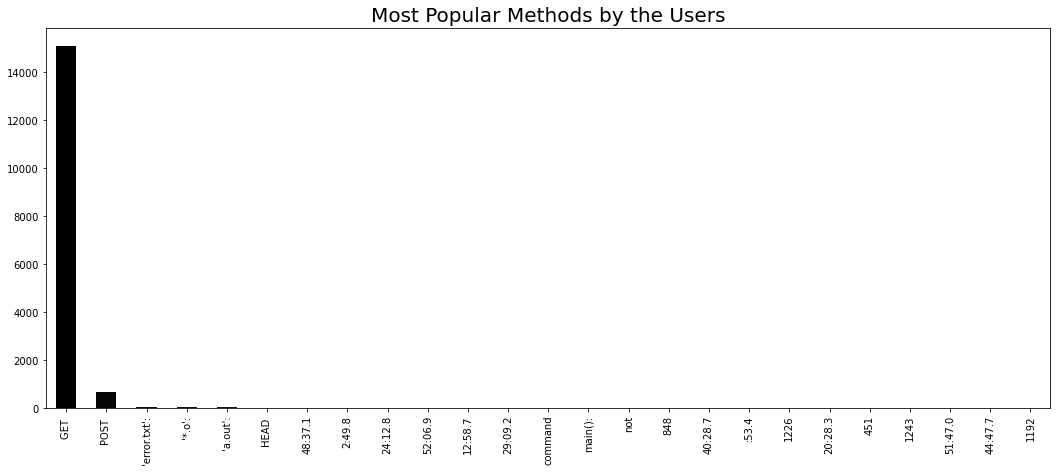

In [11]:
plt.rcParams['figure.figsize'] = (18, 7)

color = plt.cm.copper(np.linspace(0, 1, 40))
data['Methods'].value_counts().head(40).plot.bar(color = color)
plt.title('Most Popular Methods by the Users', fontsize = 20)

In [31]:
data['URL_new'].unique

<bound method Series.unique of 0                           [login.php , ]
1                         [process.php , ]
2                            [home.php , ]
3                                     [js]
4                        [bootstrap-3.3.7]
                       ...                
16002    [showcode.php?id=309&nm=ham05 , ]
16003               [allsubmission.php , ]
16004    [showcode.php?id=309&nm=ham05 , ]
16005               [allsubmission.php , ]
16006                        [home.php , ]
Name: URL_new, Length: 16007, dtype: object>

# 'Most Popular URLs by the Users'

Text(0.5, 1.0, 'Most Popular URLs by the Users')

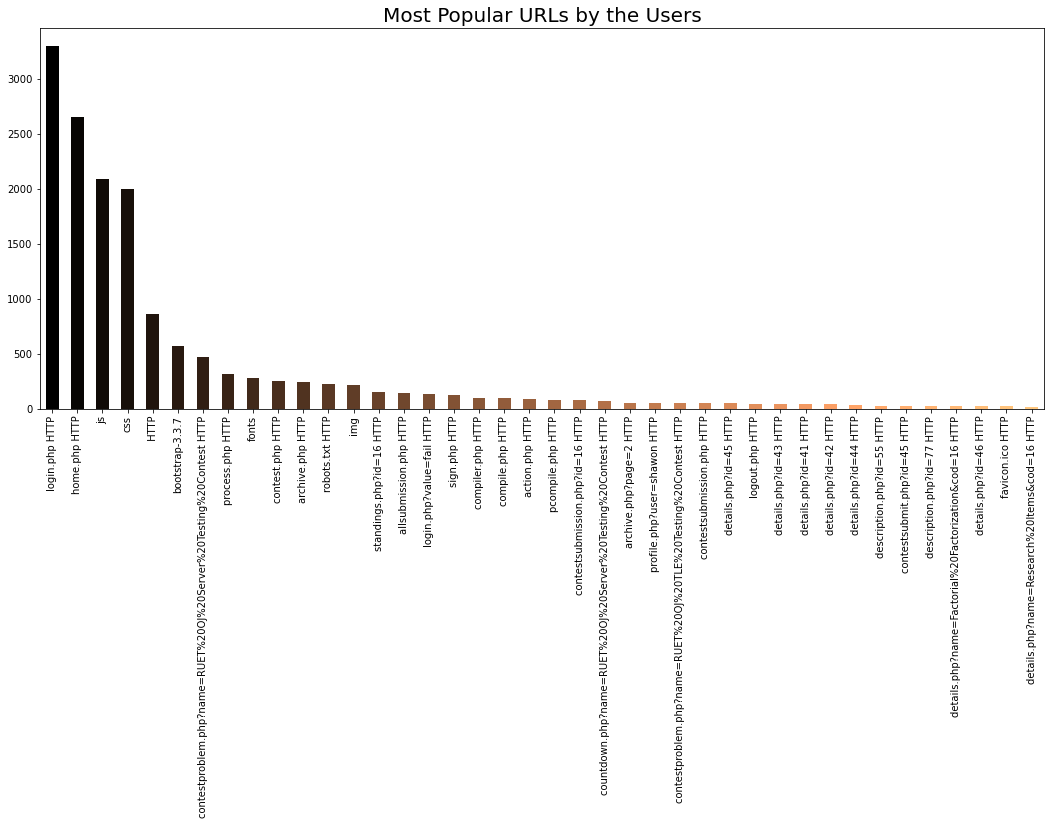

In [26]:
plt.rcParams['figure.figsize'] = (18, 7)

color = plt.cm.copper(np.linspace(0, 1, 40))
data['URL_new'].value_counts().head(40).plot.bar(color = color)
plt.title('Most Popular URLs by the Users', fontsize = 20)

# Most Popular Months of Logins

Text(0.5, 1.0, 'Most Popular Months of Logins')

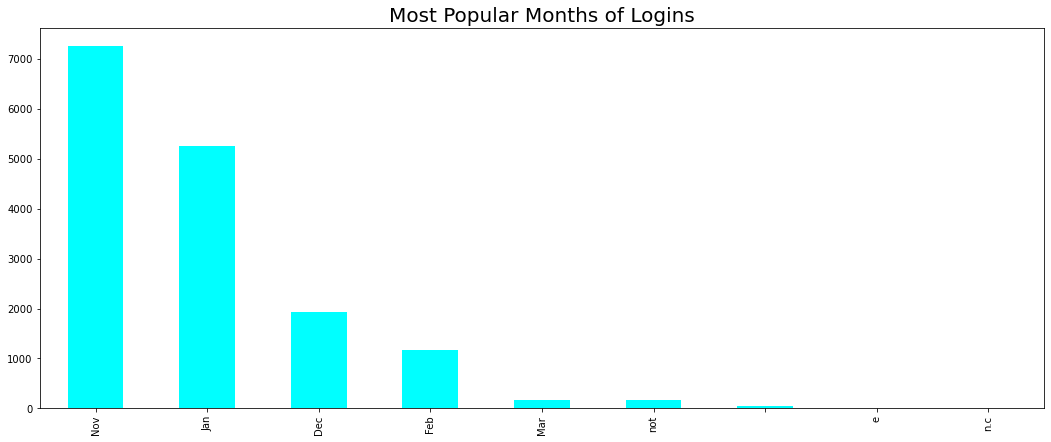

In [27]:
plt.rcParams['figure.figsize'] = (18, 7)

color = plt.cm.copper(np.linspace(0, 1, 40))
data['month'].value_counts().head(40).plot.bar(color = 'cyan')
plt.title('Most Popular Months of Logins', fontsize = 20)

Text(0.5, 1.0, 'Most Popular Days of Logins')

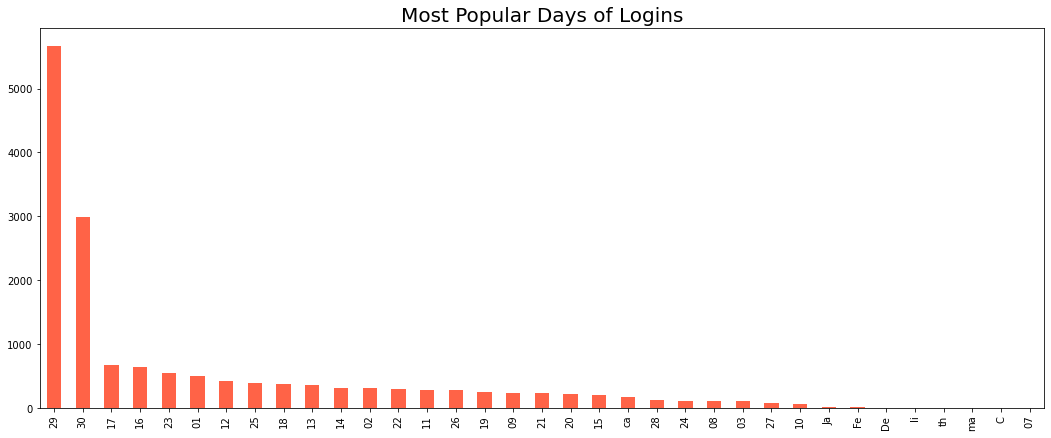

In [28]:
plt.rcParams['figure.figsize'] = (18, 7)

color = plt.cm.copper(np.linspace(0, 1, 40))
data['day'].value_counts().head(40).plot.bar(color = 'tomato')
plt.title('Most Popular Days of Logins', fontsize = 20)

# Most Popular statuses for the Users

Text(0.5, 1.0, 'Most Popular statuses for the Users')

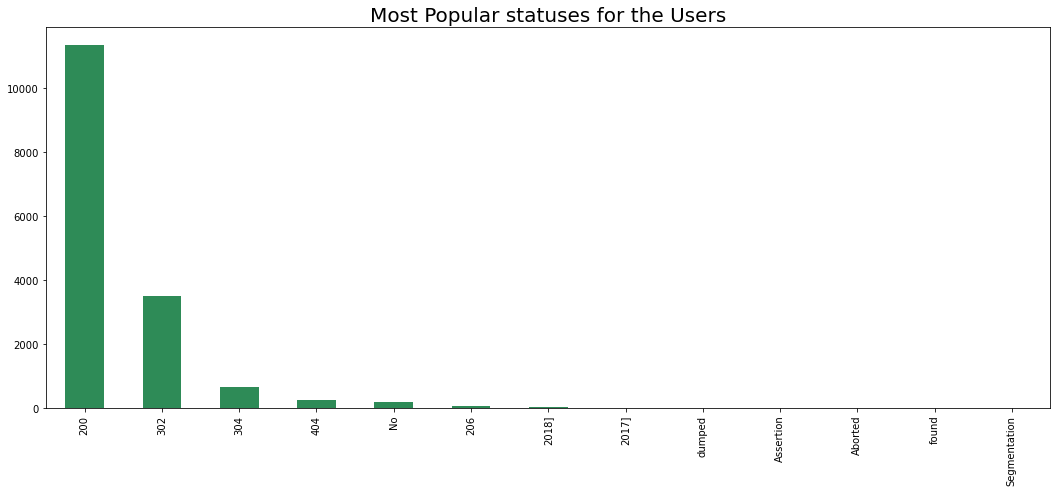

In [29]:
plt.rcParams['figure.figsize'] = (18, 7)

color = plt.cm.Wistia(np.linspace(0, 1, 40))
data['Status'].value_counts().head(40).plot.bar(color = 'seagreen')
plt.title('Most Popular statuses for the Users', fontsize = 20)

In [32]:
import plotly.express as px
  
fig = px.bar(data, x="day", y="month", color="month",
            hover_data=['day'], barmode = 'stack',title = "Months to dates")

fig.show()